https://github.com/topics/color-palette

https://github.com/karthik/wesanderson

https://www.datanovia.com/en/blog/top-r-color-palettes-to-know-for-great-data-visualization/

https://color.adobe.com/ko/create/color-wheel

## Ⅰ. 범주형

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

student = pd.read_csv('data/StudentsPerformance.csv')

groups = sorted(student['race/ethnicity'].unique())
gton = dict(zip(groups , range(5)))

student['color'] = student['race/ethnicity'].map(gton)

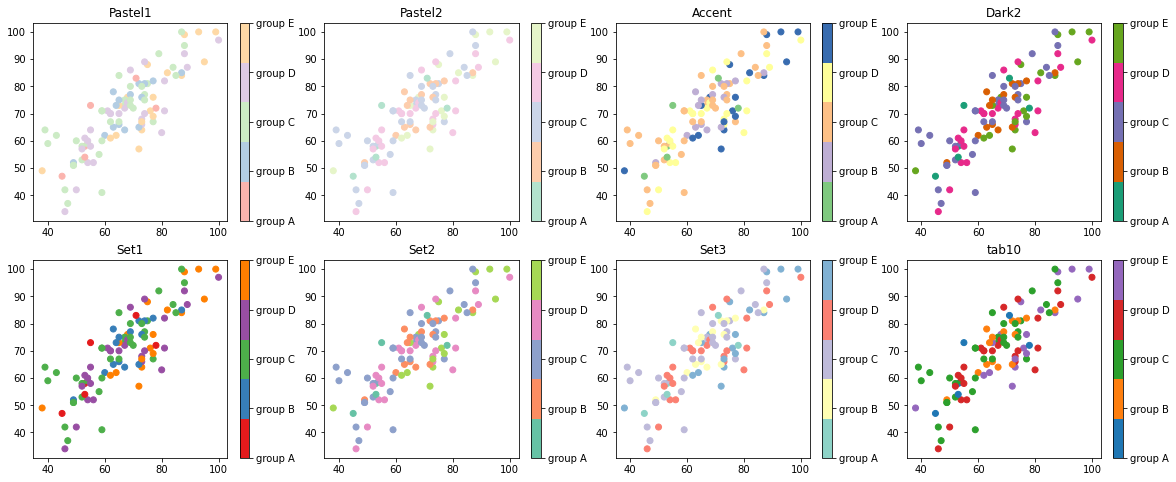

In [2]:
from matplotlib.colors import ListedColormap

qualitative_cm_list = ['Pastel1', 'Pastel2', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10']

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

student_sub = student.sample(100)

for idx, cm in enumerate(qualitative_cm_list):    
    pcm = axes[idx].scatter(student_sub['math score'], student_sub['reading score'],
                     c=student_sub['color'], cmap=ListedColormap(plt.cm.get_cmap(cm).colors[:5]))
    cbar = fig.colorbar(pcm, ax=axes[idx], ticks=range(5))
    cbar.ax.set_yticklabels(groups)
    axes[idx].set_title(cm)
    
plt.show()

## Ⅱ. 연속형

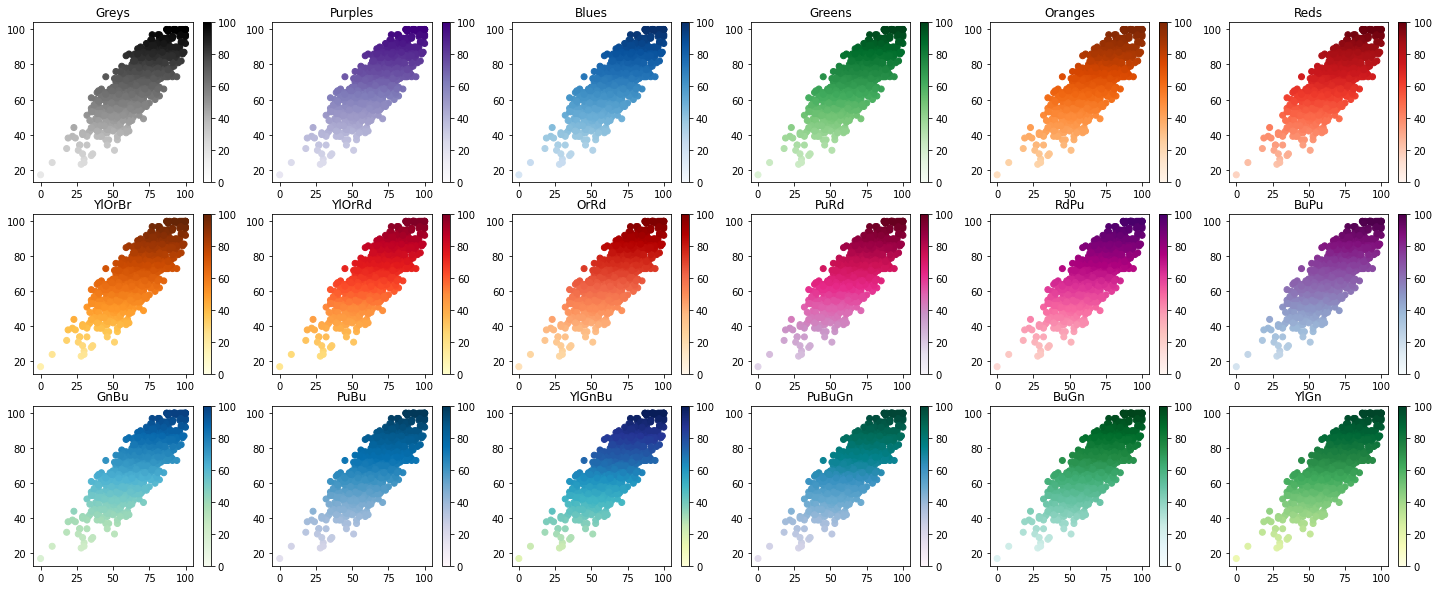

In [3]:
sequential_cm_list = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

fig, axes = plt.subplots(3, 6, figsize=(25, 10))
axes = axes.flatten()

student_sub = student.sample(100)

for idx, cm in enumerate(sequential_cm_list):    
    pcm = axes[idx].scatter(student['math score'], student['reading score'],
                            c=student['reading score'], cmap=cm, vmin=0, vmax=100)
    fig.colorbar(pcm, ax=axes[idx])
    axes[idx].set_title(cm)
    
plt.show()

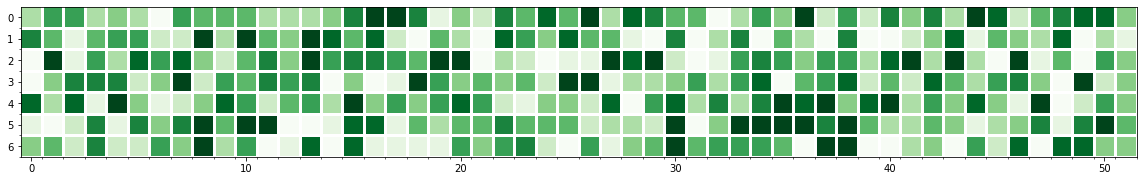

In [4]:
im =  np.random.randint(10, size=(7, 52))
fig, ax = plt.subplots(figsize=(20, 5))
ax.imshow(im, cmap='Greens')
ax.set_yticks(np.arange(7)+0.5, minor=True)
ax.set_xticks(np.arange(52)+0.5, minor=True)
ax.grid(which='minor', color="w", linestyle='-', linewidth=3)
plt.show()

## Ⅲ. 발산형

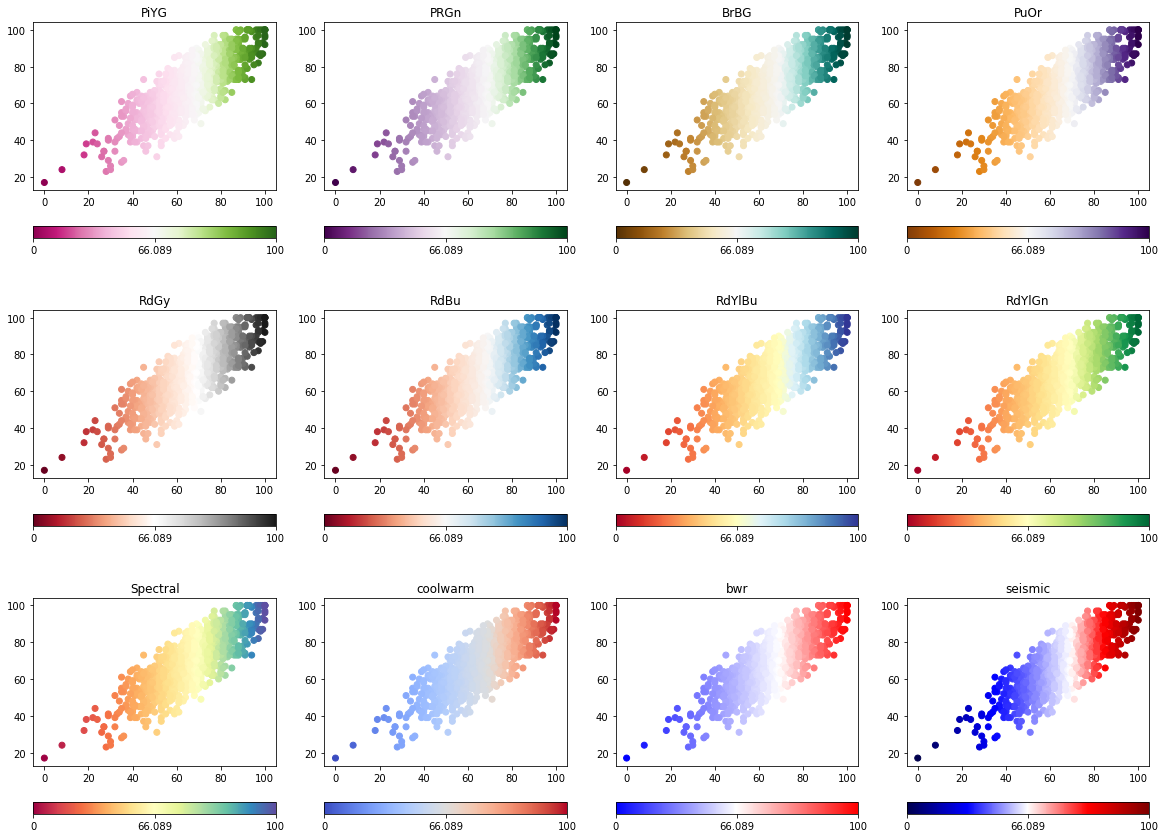

In [5]:
from matplotlib.colors import TwoSlopeNorm

diverging_cm_list = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

offset = TwoSlopeNorm(vmin=0, vcenter=student['reading score'].mean(), vmax=100)

student_sub = student.sample(100)

for idx, cm in enumerate(diverging_cm_list):    
    pcm = axes[idx].scatter(student['math score'], student['reading score'],
                            c=offset(student['math score']), cmap=cm)
    cbar = fig.colorbar(pcm, ax=axes[idx], ticks=[0, 0.5, 1], orientation='horizontal')
    cbar.ax.set_xticklabels([0, student['math score'].mean(), 100])
    axes[idx].set_title(cm)
    
plt.show()

## Ⅳ. 색상을 이용한 대비

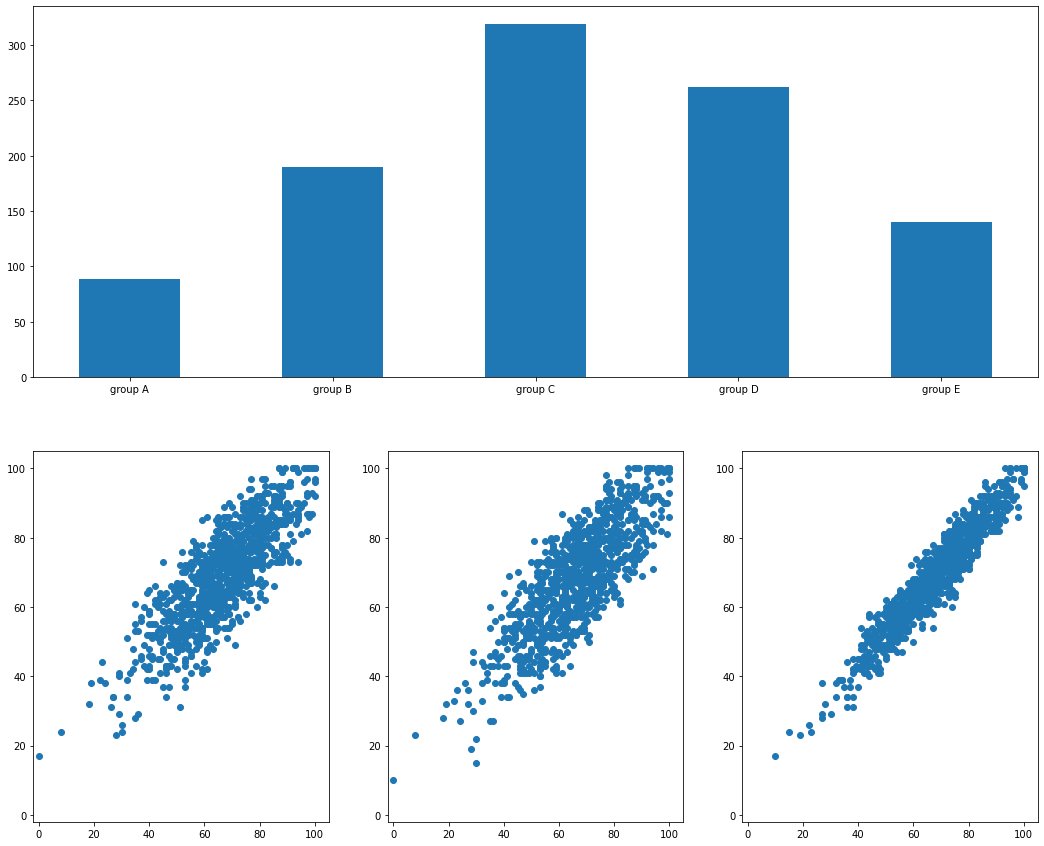

In [6]:
fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'])
ax_s2.scatter(student['math score'], student['writing score'])
ax_s3.scatter(student['writing score'], student['reading score'])

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()

### 1. 명도 대비

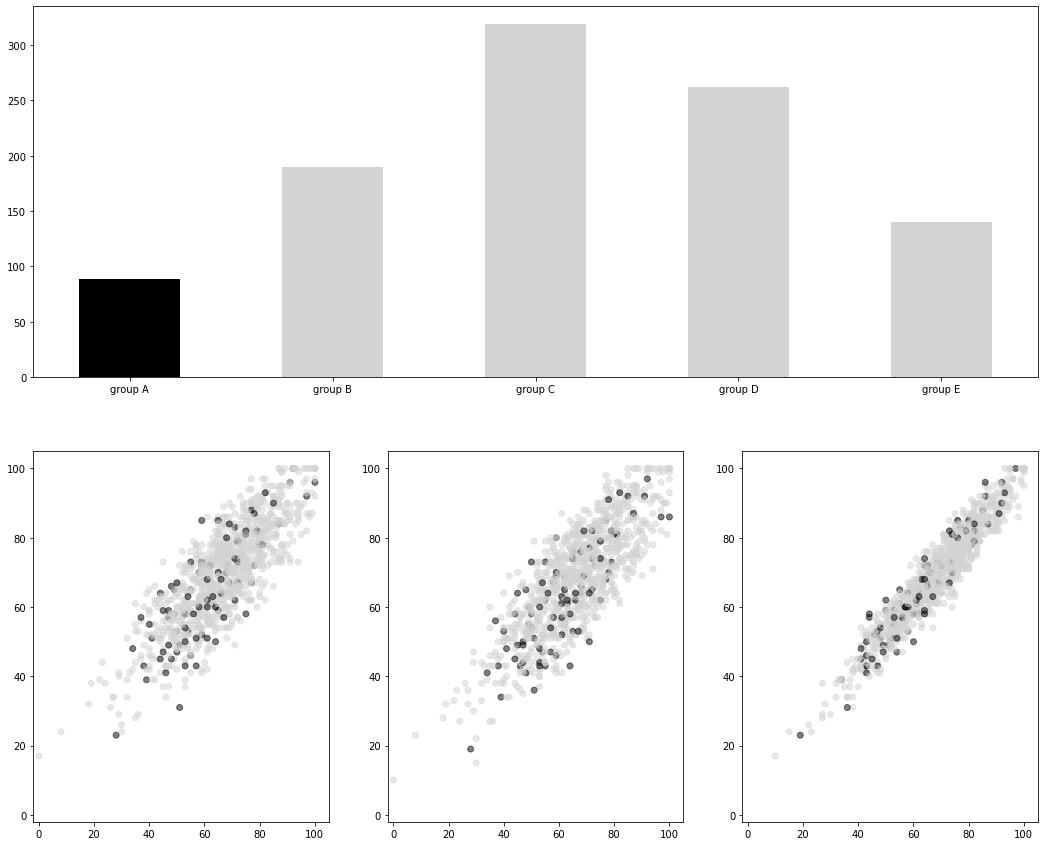

In [7]:
a_color, nota_color = 'black', 'lightgray'

colors = student['race/ethnicity'].apply(lambda x : a_color if x =='group A' else nota_color)
color_bars = [a_color] + [nota_color]*4

fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, color=color_bars, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'], color=colors, alpha=0.5)
ax_s2.scatter(student['math score'], student['writing score'], color=colors, alpha=0.5)
ax_s3.scatter(student['writing score'], student['reading score'], color=colors, alpha=0.5)

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()

### 2. 채도 대비

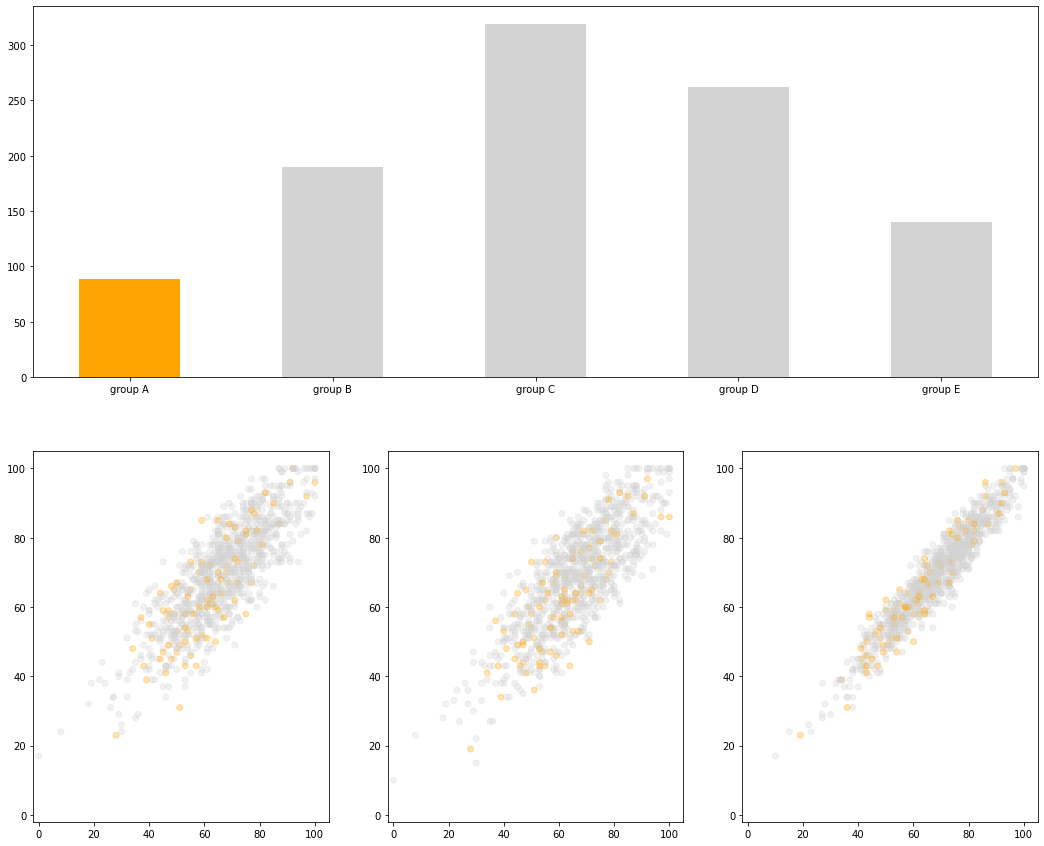

In [8]:
a_color, nota_color = 'orange', 'lightgray'

colors = student['race/ethnicity'].apply(lambda x : a_color if x =='group A' else nota_color)
color_bars = [a_color] + [nota_color]*4

fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, color=color_bars, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'], color=colors, alpha=0.3)
ax_s2.scatter(student['math score'], student['writing score'], color=colors, alpha=0.3)
ax_s3.scatter(student['writing score'], student['reading score'], color=colors, alpha=0.3)

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()

### 3. 보색 대비

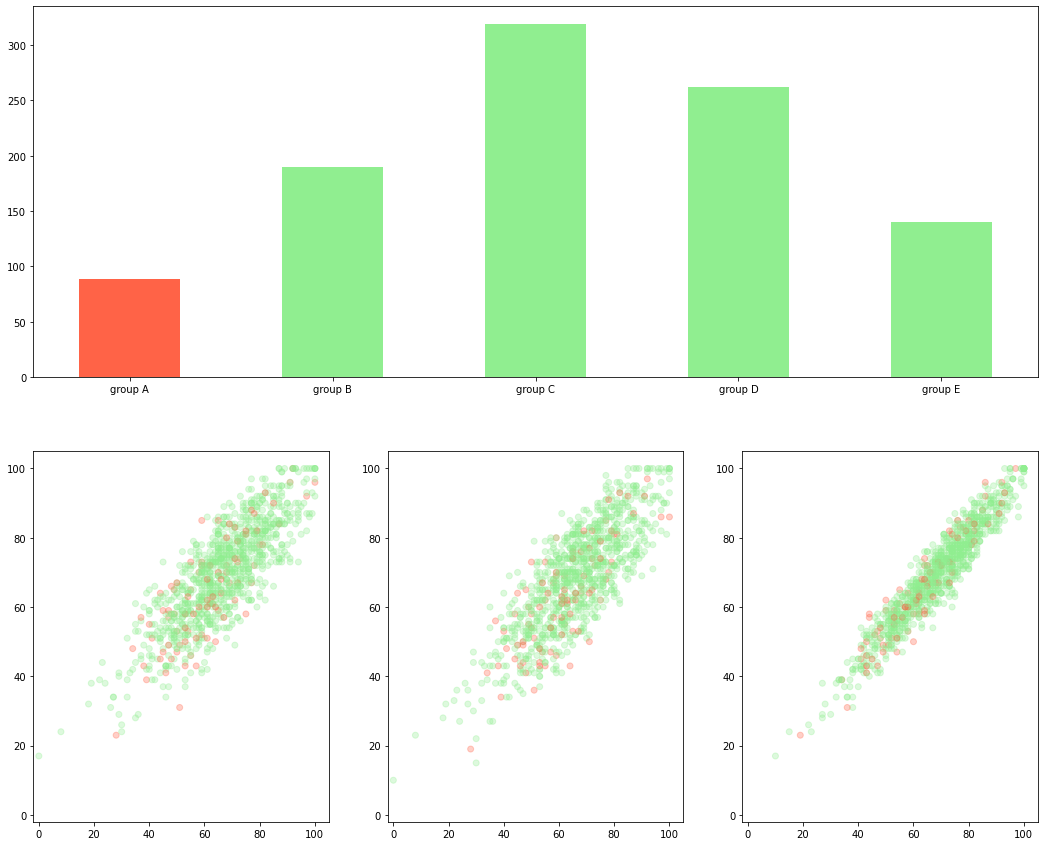

In [9]:
a_color, nota_color = 'tomato', 'lightgreen'

colors = student['race/ethnicity'].apply(lambda x : a_color if x =='group A' else nota_color)
color_bars = [a_color] + [nota_color]*4

fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, color=color_bars, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'], color=colors, alpha=0.3)
ax_s2.scatter(student['math score'], student['writing score'], color=colors, alpha=0.3)
ax_s3.scatter(student['writing score'], student['reading score'], color=colors, alpha=0.3)

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()